In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.labelsize': 14, 'figure.titlesize': 16, 
                     'axes.labelsize': 14, 'axes.titlesize': 16, 
                     'xtick.labelsize': 12, 'ytick.labelsize': 12, 
                     'legend.fontsize': 12, 
                     'axes.grid': True, 'axes.axisbelow': True,})

In [108]:
summary_df = pd.read_csv('summary.csv', index_col=0)
summary_df['Gap(CGSP-CGMP)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMP)']
summary_df['Gap(CGSP-CGMPSub)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMPSub)']
summary_df['Gap(CGMP-CGMPSub)'] = summary_df['ObjVal(CGMP)'] - summary_df['ObjVal(CGMPSub)']

summary_df['TimeGap(GB-CGSP)'] = summary_df['Time(GB)'] - summary_df['Time(CGSP)']
summary_df['TimeGap(GB-CGMP)'] = summary_df['Time(GB)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(GB-CGMPSub)'] = summary_df['Time(GB)'] - summary_df['Time(CGMPSub)']

summary_df['TimeGap(CGSP-CGMP)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(CGSP-CGMPSub)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMPSub)']
summary_df['TimeGap(CGMP-CGMPSub)'] = summary_df['Time(CGMP)'] - summary_df['Time(CGMPSub)']

summary_df.head()

,N,M,ObjVal(GB),ObjVal(CGSP),ObjVal(CGMP),ObjVal(CGMPSub),nCols(GB),nCols(CGSP),nCols(CGMP),nCols(CGMPSub),...,Gap(GB-CGMPSub),Gap(CGSP-CGMP),Gap(CGSP-CGMPSub),Gap(CGMP-CGMPSub),TimeGap(GB-CGSP),TimeGap(GB-CGMP),TimeGap(GB-CGMPSub),TimeGap(CGSP-CGMP),TimeGap(CGSP-CGMPSub),TimeGap(CGMP-CGMPSub)
Instance,,,,,,,,,,,,,,,,,,,,,
1,2,2,0.0000,0.0000,0.0000,0.0000,6,4,5,4,...,0.0,0.0,0.0,0.0,-0.034181,-0.019639,-0.031328,0.014542,0.002852,-0.011690
2,2,2,0.0000,0.0000,0.0000,0.0000,6,4,10,4,...,0.0,0.0,0.0,0.0,-0.043871,-0.037475,-0.046008,0.006397,-0.002136,-0.008533
3,2,2,0.0134,0.0134,0.0134,0.0134,6,3,5,3,...,0.0,0.0,0.0,0.0,-0.040204,-0.028959,-0.039903,0.011245,0.000301,-0.010944
4,2,2,0.0000,0.0000,0.0000,0.0000,6,4,5,4,...,0.0,0.0,0.0,0.0,-0.045440,-0.042579,-0.049840,0.002861,-0.004401,-0.007261
5,2,2,0.0000,0.0000,0.0000,0.0000,6,4,5,4,...,0.0,0.0,0.0,0.0,-0.052952,-0.029213,-0.042228,0.023739,0.010724,-0.013014


In [109]:
# Average over instances of same size
summary_df = summary_df.groupby(['N', 'M']).mean().reset_index()
summary_df.index += 1
summary_df.head()

,N,M,ObjVal(GB),ObjVal(CGSP),ObjVal(CGMP),ObjVal(CGMPSub),nCols(GB),nCols(CGSP),nCols(CGMP),nCols(CGMPSub),...,Gap(GB-CGMPSub),Gap(CGSP-CGMP),Gap(CGSP-CGMPSub),Gap(CGMP-CGMPSub),TimeGap(GB-CGSP),TimeGap(GB-CGMP),TimeGap(GB-CGMPSub),TimeGap(CGSP-CGMP),TimeGap(CGSP-CGMPSub),TimeGap(CGMP-CGMPSub)
1,2,2,0.00268,0.00268,0.00268,0.00268,6.0,3.8,6.0,3.8,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.043329,-0.031573,-0.041861,0.011757,0.001468,-0.010289
2,2,3,0.01302,0.01302,0.01302,0.01302,6.0,4.2,8.0,4.2,...,-2.220446e-17,0.000000e+00,0.000000e+00,0.000000e+00,-0.070538,-0.062611,-0.073938,0.007926,-0.003401,-0.011327
3,2,4,0.01612,0.01612,0.01612,0.01612,6.0,5.0,9.0,5.0,...,0.000000e+00,1.977585e-17,0.000000e+00,-1.977585e-17,-0.086626,-0.058779,-0.070694,0.027848,0.015933,-0.011915
4,3,2,0.00008,0.00008,0.00008,0.00008,24.0,5.0,8.0,5.0,...,-2.775558e-17,2.000353e-17,2.000353e-17,0.000000e+00,-0.079861,-0.040583,-0.057213,0.039279,0.022649,-0.016630
5,3,3,0.00644,0.00644,0.00644,0.00644,24.0,6.0,14.0,6.2,...,5.551115e-18,0.000000e+00,0.000000e+00,0.000000e+00,-0.106763,-0.070397,-0.174923,0.036366,-0.068160,-0.104526


In [110]:
rows = summary_df.groupby('N').max().reset_index()[['N', 'M']]
# Filter summary data based on the obtained pairs of N and M
summary_df = summary_df.merge(rows, on=['N', 'M'], how='inner')

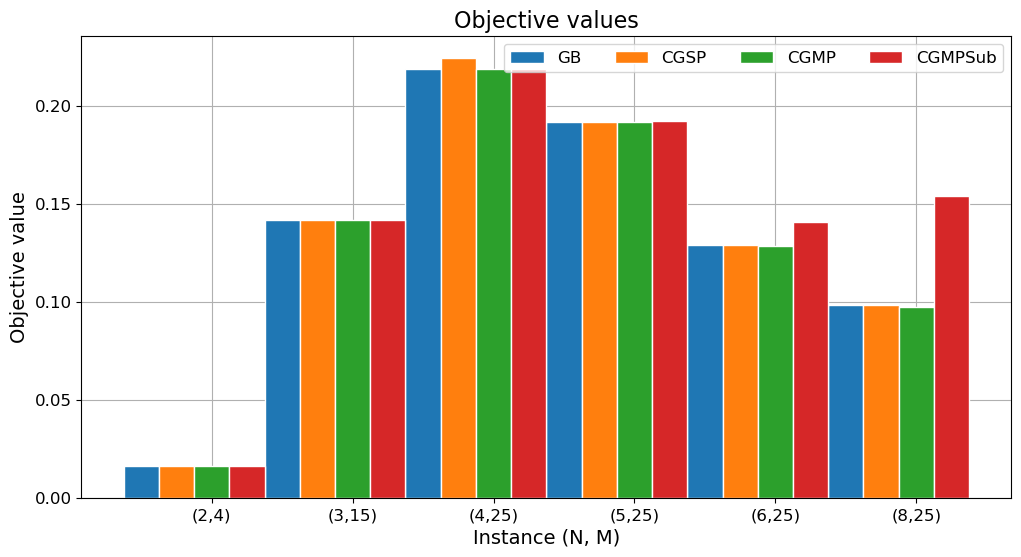

In [111]:
# Plot objective values
cols = ['ObjVal(GB)', 'ObjVal(CGSP)', 'ObjVal(CGMP)', 'ObjVal(CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('ObjVal').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Objective values')
ax.set_ylabel('Objective value')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

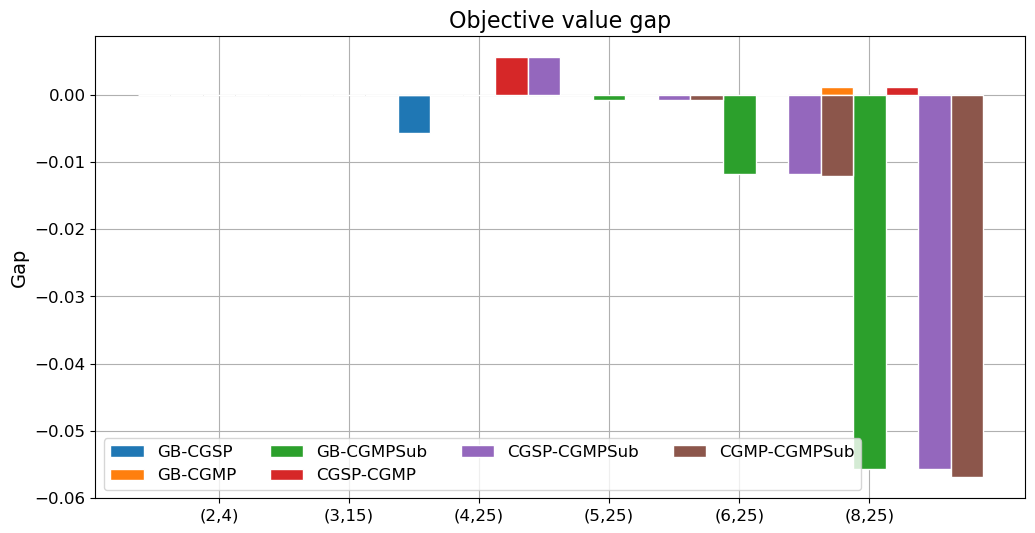

In [112]:
# Plot objective value gaps
cols = ['Gap(GB-CGSP)', 'Gap(GB-CGMP)', 'Gap(GB-CGMPSub)',
        'Gap(CGSP-CGMP)', 'Gap(CGSP-CGMPSub)', 'Gap(CGMP-CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('Gap').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Objective value gap')
ax.set_ylabel('Gap')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

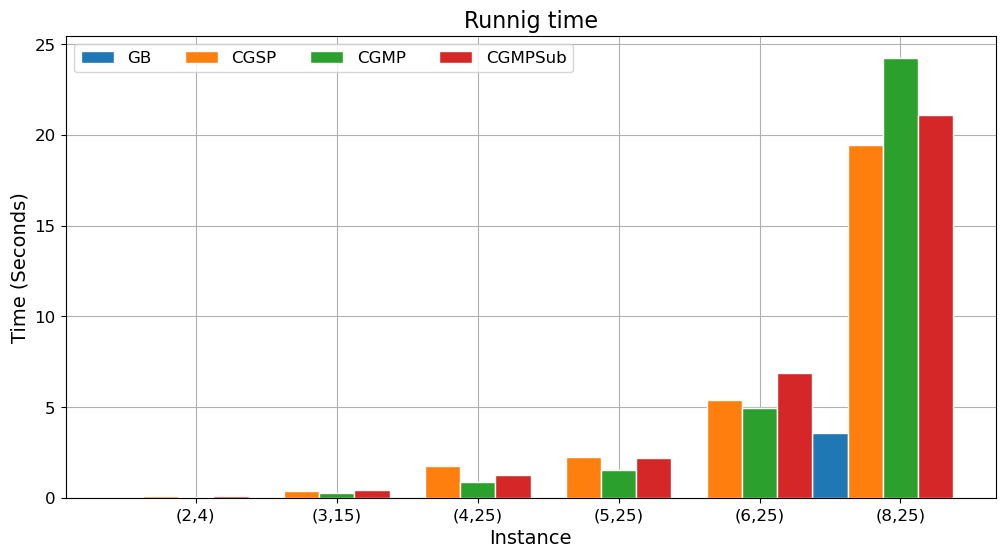

In [113]:
# Plot time
cols = ['Time(GB)', 'Time(CGSP)', 'Time(CGMP)', 'Time(CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('Time').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Runnig time')
ax.set_ylabel('Time (Seconds)')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

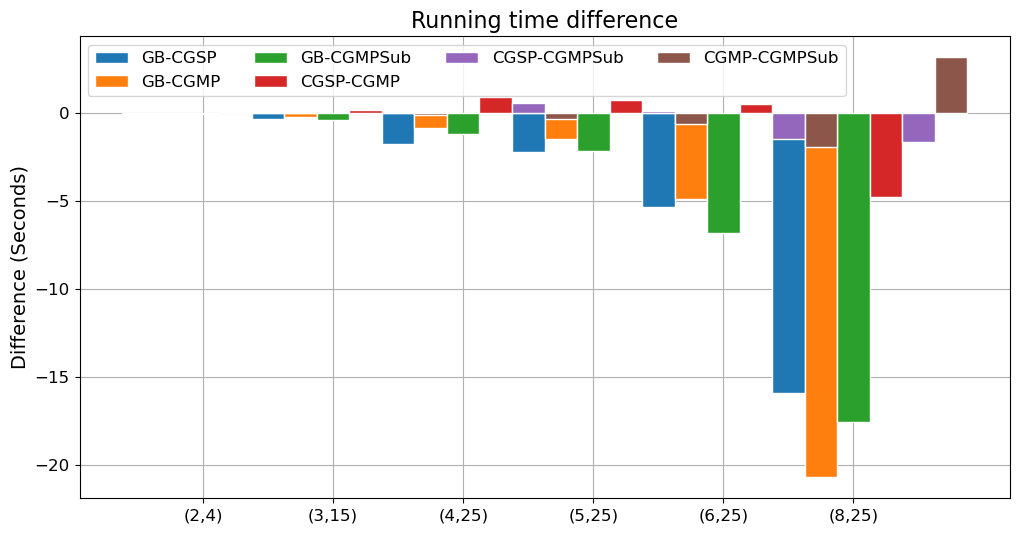

In [114]:
# Plot time difference
cols = ['TimeGap(GB-CGSP)', 'TimeGap(GB-CGMP)', 'TimeGap(GB-CGMPSub)',
        'TimeGap(CGSP-CGMP)', 'TimeGap(CGSP-CGMPSub)', 'TimeGap(CGMP-CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('TimeGap').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Running time difference')
ax.set_ylabel('Difference (Seconds)')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

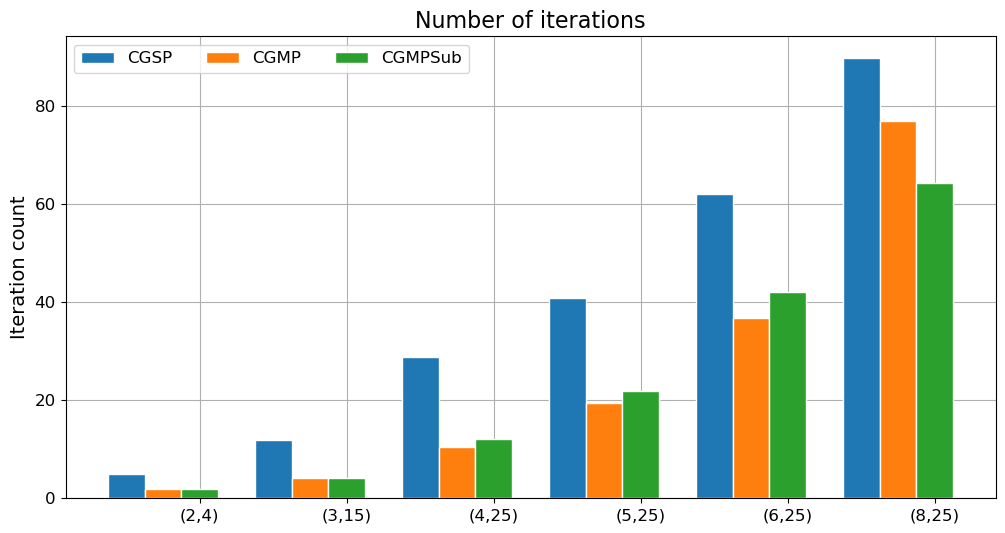

In [115]:
# Plot number of iterations
cols = ['K(CGSP)', 'K(CGMP)', 'K(CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('K').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Number of iterations')
ax.set_ylabel('Iteration count')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

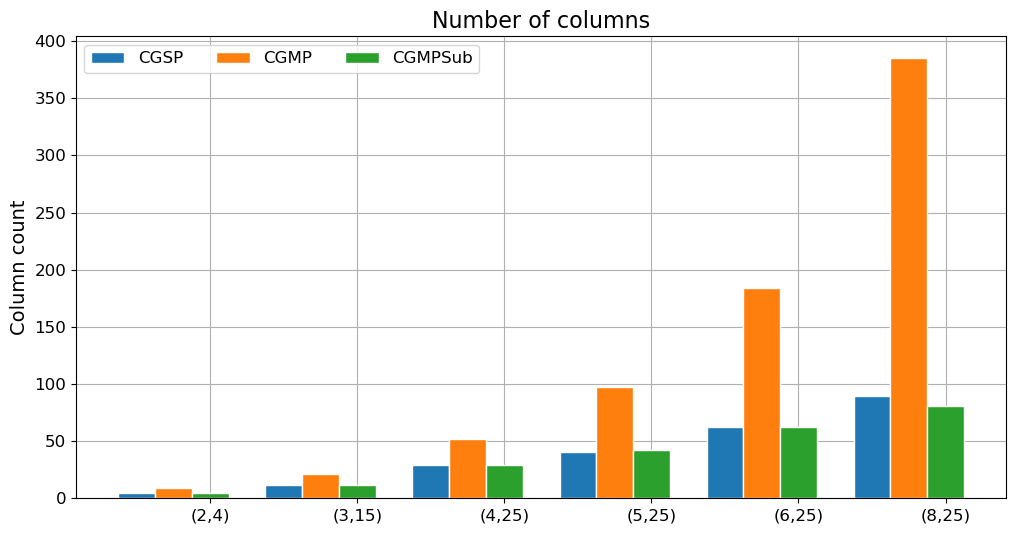

In [116]:
# Plot number of permutations/columns
cols = ['nCols(CGSP)', 'nCols(CGMP)', 'nCols(CGMPSub)']

x = np.arange(1, summary_df.shape[0]+1)
width, multiplier = 0.25, 0

fig, ax = plt.subplots(figsize=(12, 6))#plt.subplots(figsize=(20, 6))
for col in cols:
    offset = width * multiplier
    ax.bar(x + offset, summary_df[col], width=width, edgecolor='w', label=col.strip('nCols').strip('(').strip(')'))
    multiplier += 1

ax.set_title('Number of columns')
ax.set_ylabel('Column count')
ax.set_xlabel('Instance (N, M)')
ax.set_xticks(x + 2*width, x)
# Add xticks labels as (n,m) pairs
ax.set_xticklabels([f'({n},{m})' for n, m in zip(summary_df['N'], summary_df['M'])])
ax.legend(ncol=4)
plt.show()

In [117]:
# # Plot objective values
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['ObjVal(GB)'], marker='o', label='GB')
# ax.plot(summary_df.index, summary_df['ObjVal(CGSP)'], marker='o', label='CGSP')
# ax.plot(summary_df.index, summary_df['ObjVal(CGMP)'], marker='o', label='CGMP')
# ax.plot(summary_df.index, summary_df['ObjVal(CGMPSub)'], marker='o', label='CGMPSub')
# ax.set_title('Objective values')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Objective value')
# plt.show()

In [118]:
# # Plot objective value gaps
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['Gap(GB-CGSP)'], marker='o', label='GB-CGSP')
# ax.plot(summary_df.index, summary_df['Gap(GB-CGMP)'], marker='o', label='GB-CGMP')
# ax.plot(summary_df.index, summary_df['Gap(GB-CGMPSub)'], marker='o', label='GB-CGMPSub')
# ax.plot(summary_df.index, summary_df['Gap(CGSP-CGMP)'], marker='o', label='CGSP-CGMP')
# ax.plot(summary_df.index, summary_df['Gap(CGSP-CGMPSub)'], marker='o', label='CGSP-CGMPSub')
# ax.plot(summary_df.index, summary_df['Gap(CGMP-CGMPSub)'], marker='o', label='CGMP-CGMPSub')
# ax.set_title('Objective value gap')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Gap')
# plt.show()

In [119]:
# # Plot time
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['Time(GB)'], marker='o', label='GB')
# ax.plot(summary_df.index, summary_df['Time(CGSP)'], marker='o', label='CGSP')
# ax.plot(summary_df.index, summary_df['Time(CGMP)'], marker='o', label='CGMP')
# ax.plot(summary_df.index, summary_df['Time(CGMPSub)'], marker='o', label='CGMPSub')
# ax.set_title('Runnig time')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Time (Seconds)')
# plt.show()

In [120]:
# # Plot time difference
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['TimeGap(GB-CGSP)'], marker='o', label='GB-CGSP')
# ax.plot(summary_df.index, summary_df['TimeGap(GB-CGMP)'], marker='o', label='GB-CGMP')
# ax.plot(summary_df.index, summary_df['TimeGap(GB-CGMPSub)'], marker='o', label='GB-CGMPSub')
# ax.plot(summary_df.index, summary_df['TimeGap(CGSP-CGMP)'], marker='o', label='CGSP-CGMP')
# ax.plot(summary_df.index, summary_df['TimeGap(CGSP-CGMPSub)'], marker='o', label='CGSP-CGMPSub')
# ax.plot(summary_df.index, summary_df['TimeGap(CGMP-CGMPSub)'], marker='o', label='CGMP-CGMPSub')
# ax.set_title('Running time difference')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Difference (Seconds)')
# plt.show()

In [121]:
# # Plot number of iterations
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['K(CGSP)'], marker='o', label='CGSP')
# ax.plot(summary_df.index, summary_df['K(CGMP)'], marker='o', label='CGMP')
# ax.plot(summary_df.index, summary_df['K(CGMPSub)'], marker='o', label='CGMP')
# ax.set_title('Number of iterations')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Iteration count')
# plt.show()

In [122]:
# # Plot number of permutations/columns
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(summary_df.index, summary_df['nCols(CGSP)'], marker='o', label='CGSP')
# ax.plot(summary_df.index, summary_df['nCols(CGMP)'], marker='o', label='CGMP')
# ax.plot(summary_df.index, summary_df['nCols(CGMPSub)'], marker='o', label='CGMPSub')
# ax.set_title('Number of columns')
# ax.set_xlabel('Instance')
# ax.set_ylabel('Column count')
# plt.show()